# CME 241 Assignment 5

## Shaan Patel

### Question 1

In [8]:
from typing import Tuple, Sequence, Iterator, List
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
from rl.chapter5.func_approx_simple_examples import example_model_data_generator

Tuple5 = Tuple[float, float, float, float, float]
Triple = Tuple[float, float, float]
DataSeq = Sequence[Tuple[Triple, float]]

In [133]:
def cubic_spline(
    num_pts: int, 
    data: List[Tuple[float,float]]
    ):

    n = num_pts - 1

    a = [0]*num_pts
    for i in range(num_pts):
        a[i] = data[i][1]
    
    b = [0]*n
    d = [0]*n

    h = [0]*n
    for i in range(n):
        h[i] = data[i+1][0] - data[i][0]

    alpha = [0]*n
    for i in range(1,n):
        alpha[i] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i - 1])
    
    c = [0]*num_pts
    l = [0]*num_pts
    mu = [0]*num_pts
    z = [0]*num_pts

    l[0] = 1
    mu[0] = 0
    z[0] = 0

    for i in range(1,n):
        l[i] = 2*(data[i+1][0] - data[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    
    l[n] = 1
    z[n] = 0
    c[n] = 0


    for i in range(n-1,-1, -1):
        c[i] = z[i] - mu[i]*c[i+1]
        b[i] = (a[i+1] - a[i])/h[i] - (h[i]*(c[i+1] - 2*c[i]))/3
        d[i] = (c[i+1] - c[i])/(3*h[i])
    
    output = [tuple()]*n
    for i in range(n):
        output[i] = (a[i], b[i], c[i], d[i], data[i][0])

    return output


In [134]:
test_num_pts = 10
data_gen: Iterator[Tuple[Triple, float]] = example_model_data_generator()
test_data: DataSeq = list(islice(data_gen, test_num_pts))

dataset = [tuple()]*test_num_pts

for i in range(test_num_pts):
    dataset[i] = (test_data[i][0][0], test_data[i][1])

dataset.sort(key = lambda y: y[0])

spline = cubic_spline(test_num_pts, dataset)

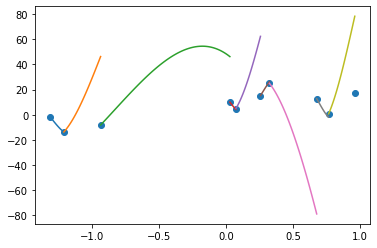

In [136]:
points = np.array(dataset)
plt.scatter(points[:,0], points[:,1])

for i in range(test_num_pts - 1):
    xvals = np.linspace(dataset[i][0], dataset[i+1][0], 100)
    funclist = []
    for j in range(len(xvals)):
        funcval = spline[i][0] + spline[i][1]*(xvals[j] - spline[i][4]) + spline[i][2]*(xvals[j] - spline[i][4])**2 +\
            spline[i][3]*(xvals[j] - spline[i][4])**3
        funclist.append(funcval)

    plt.plot(xvals, funclist)





In [137]:
print(dataset)

[(-1.3133680464393591, -1.9766390378250434), (-1.2129994692673685, -13.784704979381111), (-0.9379874874905388, -8.219904153112097), (0.02901515026506252, 9.99333258466472), (0.07400454180573393, 4.9056500194142405), (0.25779358412409464, 15.237787817463055), (0.325063437675559, 24.93318158763854), (0.6784624832049031, 12.767162455103124), (0.7674774137477456, 0.6586982556545005), (0.9633287433788702, 17.13185421891066)]
